In [1]:
#from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#drive.mount('/content/drive')
#pasta_drive = '/content/drive/MyDrive/Classroom/DCC127-2020.3-A - MINERAÇÃO DE DADOS - DEPTO DE CIENCIA DA COMPUTACAO  ICE/'
pasta_drive = ''
dados = pd.read_csv(pasta_drive + "trabalho2_dados_21.csv")

dados

,nome,plataforma,genero,editora,vendas,lancamento,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios,fabricante
0,Green Lantern: Rise of the Manhunters,X360,Action,Warner Bros. Interactive Entertainment,0.10,7-Jun-11,59.0,17.0,7,22.0,Double Helix Games
1,Kinect Sports: Season Two,X360,Sports,Microsoft Game Studios,2.18,25-Oct-11,66.0,46.0,6.3,27.0,"BigPark, Rare Ltd."
2,Brothers in Arms: Double Time,Wii,Shooter,Ubisoft,0.12,23-Sep-08,45.0,13.0,6.6,17.0,Gearbox Software
3,Steambot Chronicles: Battle Tournament,PSP,Fighting,Irem Software Engineering,0.06,30-Jun-09,54.0,14.0,6.1,7.0,Irem
4,Tiger Woods PGA Tour 07,Wii,Sports,Electronic Arts,0.46,13-Mar-07,71.0,41.0,6.9,44.0,EA Redwood Shores
...,...,...,...,...,...,...,...,...,...,...,...
1627,Lost Planet: Extreme Condition,X360,Shooter,Capcom,1.31,12-Jan-07,79.0,76.0,7.1,161.0,Capcom
1628,Biohazard: Revival Selection,X360,Action,Capcom,0.03,NaN,NaN,NaN,NaN,NaN,NaN
1629,Ratatouille,X360,Platform,THQ,0.24,26-Jun-07,56.0,14.0,tbd,NaN,Heavy Iron Studios
1630,Catherine,PS3,Adventure,Deep Silver,0.60,26-Jul-11,79.0,61.0,7.8,246.0,Atlus


In [3]:
#Remove as linhas que contém valores nulos e ordena o resultado pelo nome do jogo
dados = dados.sort_values('nome')
dados.head()

,nome,plataforma,genero,editora,vendas,lancamento,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios,fabricante
1555,0-ji no Kane to Cinderella: Halloween Wedding,PSP,Misc,Quinrose,0.01,NaN,NaN,NaN,NaN,NaN,NaN
738,007: Quantum of Solace,PS3,Action,Activision,1.09,NaN,NaN,NaN,NaN,NaN,NaN
1197,007: Quantum of Solace,Wii,Action,Activision,0.62,NaN,NaN,NaN,NaN,NaN,NaN
1307,1/2 Summer +,PSP,Adventure,Kaga Create,0.01,NaN,NaN,NaN,NaN,NaN,NaN
1456,10 Minute Solution,Wii,Sports,Activision,0.06,29-Jun-10,NaN,NaN,tbd,NaN,Anchor Bay Entertainment


Analisando os tipos de cada varíavel, bem como a descrição das mesmas.

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 1555 to 669
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nome                1632 non-null   object 
 1   plataforma          1632 non-null   object 
 2   genero              1632 non-null   object 
 3   editora             1630 non-null   object 
 4   vendas              1632 non-null   float64
 5   lancamento          1137 non-null   object 
 6   avaliacao-criticos  916 non-null    float64
 7   numero-criticos     916 non-null    float64
 8   avaliacao-usuarios  1112 non-null   object 
 9   numero-usuarios     851 non-null    float64
 10  fabricante          1128 non-null   object 
dtypes: float64(4), object(7)
memory usage: 153.0+ KB


Antes de começarmos a análise, iremos transformar o parâmetro gênero em uma variável categórica. Outra questão, observada pelo .info(), é o tipo da variável  avaliacao-usuarios, vamos passar para float.

In [5]:
dados['genero'] = dados.genero.astype('category')
dados['plataforma'] = dados.genero.astype('category')
dados['avaliacao-usuarios'] = pd.to_numeric(dados['avaliacao-usuarios'],errors='coerce')
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 1555 to 669
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   nome                1632 non-null   object  
 1   plataforma          1632 non-null   category
 2   genero              1632 non-null   category
 3   editora             1630 non-null   object  
 4   vendas              1632 non-null   float64 
 5   lancamento          1137 non-null   object  
 6   avaliacao-criticos  916 non-null    float64 
 7   numero-criticos     916 non-null    float64 
 8   avaliacao-usuarios  851 non-null    float64 
 9   numero-usuarios     851 non-null    float64 
 10  fabricante          1128 non-null   object  
dtypes: category(2), float64(5), object(4)
memory usage: 131.5+ KB


Como podemos observar na tabela acima, temos valores nulos no dataframe. Portanto, iremos retirar aquelas linhas que possuem valores nulos, para não atrapalhar a nossa análise.

In [6]:
dados.dropna(axis=0,inplace=True)

Analisando a frequência, mediana, média e outros cálculos estatísticos, iremos aplicar o describe() no dataframe.

In [7]:
dados.describe()

,vendas,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios
count,805.000000,805.000000,805.000000,805.000000,805.000000
mean,0.884025,69.073292,34.724224,6.914783,119.853416
std,1.916295,14.531433,21.408221,1.495613,313.970149
min,0.010000,13.000000,4.000000,0.900000,4.000000
25%,0.160000,61.000000,17.000000,6.200000,13.000000
50%,0.380000,72.000000,32.000000,7.200000,29.000000
75%,0.850000,80.000000,49.000000,8.000000,85.000000
max,27.250000,98.000000,101.000000,9.500000,2923.000000


In [8]:
#describe
print('**Describe das variáveis que não são numéricas')
for i in dados.keys():
  if type(dados[i][0])!=np.float64:
    print(dados[i].describe())
    print("\n")

**Describe das variáveis que não são numéricas
count                              805
unique                             695
top       LEGO Harry Potter: Years 5-7
freq                                 5
Name: nome, dtype: object


count        805
unique        12
top       Action
freq         206
Name: plataforma, dtype: object


count        805
unique        12
top       Action
freq         206
Name: genero, dtype: object


count                 805
unique                 78
top       Electronic Arts
freq                  125
Name: editora, dtype: object


count           805
unique          421
top       20-Oct-09
freq              9
Name: lancamento, dtype: object


count           805
unique          361
top       EA Canada
freq             25
Name: fabricante, dtype: object




In [9]:
dados.corr()

,vendas,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios
vendas,1.000000,0.322639,0.330162,0.131051,0.556160
avaliacao-criticos,0.322639,1.000000,0.463458,0.608111,0.336030
numero-criticos,0.330162,0.463458,1.000000,0.316025,0.467206
avaliacao-usuarios,0.131051,0.608111,0.316025,1.000000,0.102852
numero-usuarios,0.556160,0.336030,0.467206,0.102852,1.000000


## Nome do gráfico

In [11]:

# Thiago
#d = dados.groupby(['plataforma','genero']).sum()
d = dados[dados.plataforma == '3DS'][['vendas','genero']].groupby(['genero']).sum()
print(d)
print('---')
for i in range(12):
  print(d.iloc[i])

              vendas
genero              
Action           0.0
Adventure        0.0
Fighting         0.0
Misc             0.0
Platform         0.0
Puzzle           0.0
Racing           0.0
Role-Playing     0.0
Shooter          0.0
Simulation       0.0
Sports           0.0
Strategy         0.0
---
vendas    0.0
Name: Action, dtype: float64
vendas    0.0
Name: Adventure, dtype: float64
vendas    0.0
Name: Fighting, dtype: float64
vendas    0.0
Name: Misc, dtype: float64
vendas    0.0
Name: Platform, dtype: float64
vendas    0.0
Name: Puzzle, dtype: float64
vendas    0.0
Name: Racing, dtype: float64
vendas    0.0
Name: Role-Playing, dtype: float64
vendas    0.0
Name: Shooter, dtype: float64
vendas    0.0
Name: Simulation, dtype: float64
vendas    0.0
Name: Sports, dtype: float64
vendas    0.0
Name: Strategy, dtype: float64


## Nome do outro gráfico

/home/gabic9814/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


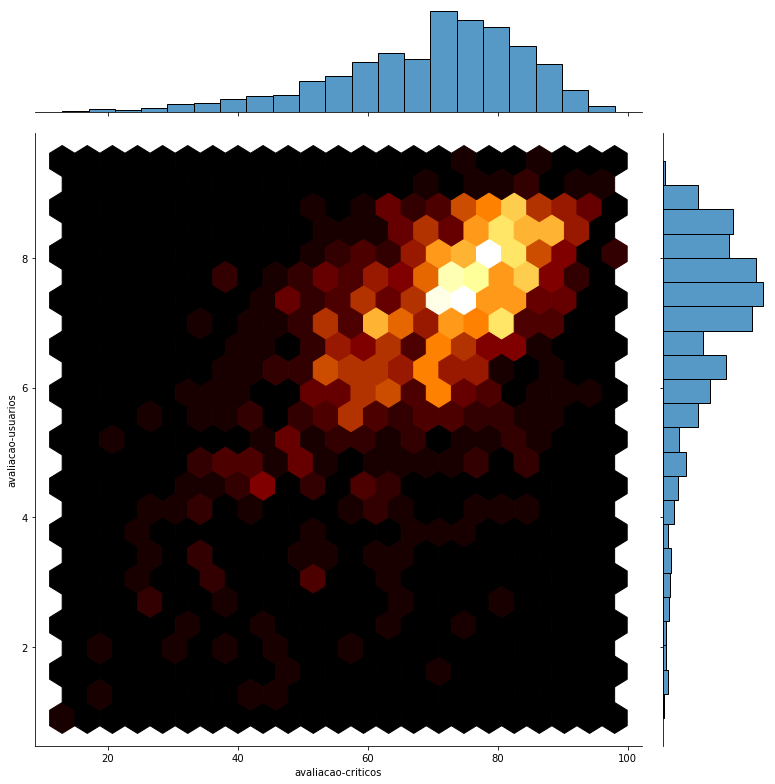

In [12]:
sns.jointplot(x='avaliacao-criticos',y='avaliacao-usuarios',data=dados,
              kind='hex', cmap= 'afmhot', size=11)

In [13]:
teste = dados.groupby(['genero','plataforma']).vendas.sum()
type(teste.iloc[0])

numpy.float64

In [14]:
teste2 = teste.unstack()

Text(0, 0.5, 'Vendas')

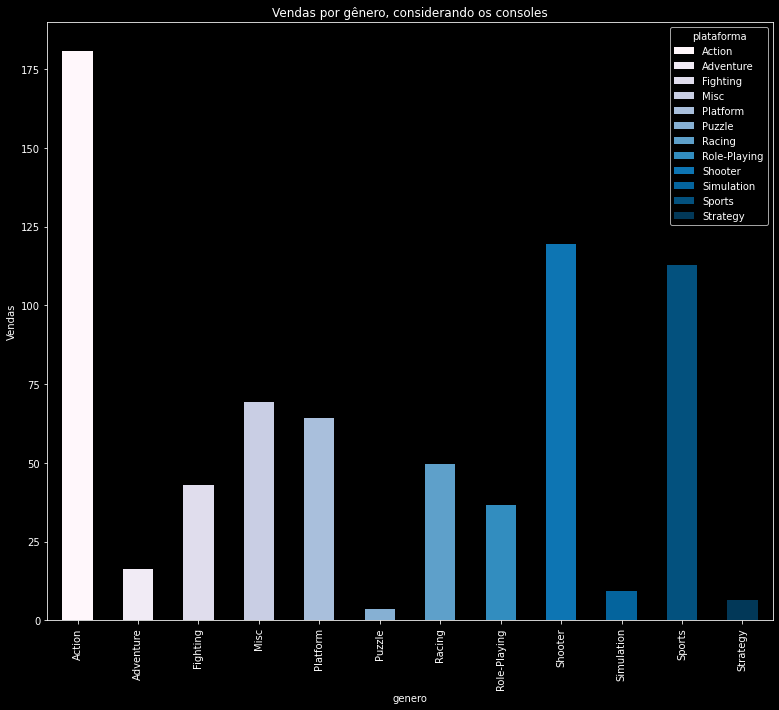

In [15]:
plt.style.use('dark_background')
teste.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu',  
                           grid=False,  figsize=(13,11))
plt.title('Vendas por gênero, considerando os consoles')
plt.ylabel('Vendas')